In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_schooldata = pd.read_csv('C:\\Users\\aksha\\WCPSS_Data_Analysis\\data\\Wake_County_Public_Schools.csv')
df_schooldata.head(10)



In [ ]:
df_schooldata = df_schooldata.drop(columns=['X','Y','OBJECTID','TAG','PHONE','ADDRESSNUM','ZIPCODE','MAGNETPROGRAM','WEBSITE','DISTRICT'])

In [ ]:
print(df_schooldata.columns)

In [ ]:
#load performance data 

df_performance = pd.read_excel("C:\\Users\\aksha\\WCPSS_Data_Analysis\\data\\2023-24 School Assessment and Other Indicator Data.xlsx",sheet_name='Assess-Ind Data Set')


In [ ]:
df_performance.head(10)

In [ ]:
df_performance.columns

In [ ]:
#Drop all unnecessary columns that are not needed for our analysis

df_performance = df_performance.drop(columns=['reporting_year', 'lea_code', 'lea_name', 'school_code','title_1'])

In [ ]:
df_performance.columns

In [ ]:
df_performance = df_performance.drop(columns='sbe_region')

In [ ]:
# Let's merge data from both sources to one single data frame

df_wakeschools = df_schooldata.merge(df_performance ,left_on='NAME',right_on='school_name',how ='inner')


In [ ]:
df_wakeschools.head(10)

In [ ]:
# Filter only for elementary schools and 'ALL' subgroups to get a generic data across all students
df_wakeschools = df_wakeschools[(df_wakeschools['GRADELEVEL']=='Elementary') & (df_wakeschools['subgroup']=='ALL')]

In [ ]:
df_wakeschools.head(10)

In [ ]:


#check if the type and gradelevel have the same value of elementary

df_wakeschools['GRADELEVEL'].value_counts()

In [ ]:
df_wakeschools['TYPE'].value_counts()

In [ ]:
# Create a new column for magnet school

df_wakeschools['Magnet_Status'] = df_wakeschools['TYPE'].str.lower().str.contains('magnet').map({True:'Yes',False:'No'})

In [ ]:
df_wakeschools['Magnet_Status'].value_counts()

In [ ]:
# Drop all unnecessary columns from the dataframe
df_wakeschools=df_wakeschools.drop(columns=['GRADELEVEL','ADDRESS','TYPE'])

In [ ]:
df_wakeschools['subject'].unique()

In [ ]:
df_wakeschools['subject'].value_counts()

In [ ]:
subjects = df_wakeschools['subject'].value_counts().index[:10].to_list()

In [ ]:
print(subjects)

In [ ]:
df_subjects = df_wakeschools[df_wakeschools['subject'].isin(subjects)]

In [ ]:
#Let's check of all the values in glp_pct are numeric

df_subjects['glp_pct'].map(type).value_counts()

In [ ]:
#There are types other than float so lets see what other values are there and convert everything to numeric

df_subjects['glp_pct']=pd.to_numeric(df_subjects['glp_pct'],errors='coerce')

In [ ]:
df_area_wise_performance = df_subjects.groupby('CITY')['glp_pct'].mean()

In [ ]:
df_area_wise_performance

In [ ]:
df_area_wise_performance = df_area_wise_performance.sort_values(ascending=False)

In [ ]:
df_area_wise_performance=df_area_wise_performance.reset_index()

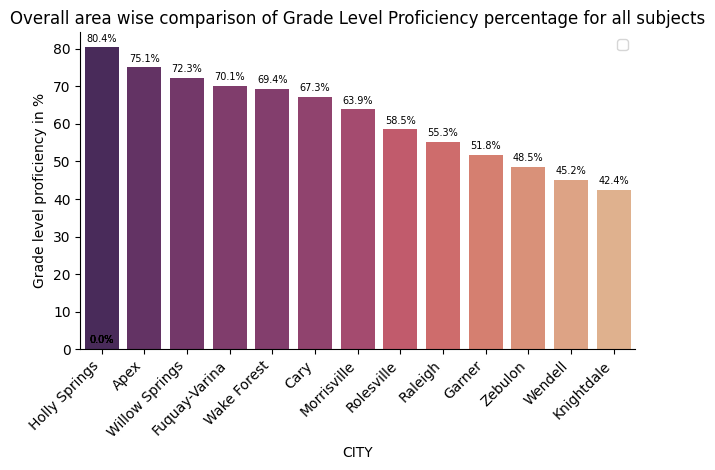

In [244]:
ax=sns.barplot(data = df_area_wise_performance , x='CITY', y='glp_pct',hue='glp_pct',palette='flare')
sns.despine()
plt.title('Overall area wise comparison of Grade Level Proficiency percentage for all subjects')
plt.xticks(rotation =45 ,ha='right')
plt.tight_layout()
plt.ylabel('Grade level proficiency in %')
plt.legend("")

# Annotating exact percentage for each bar

for bar in ax.patches:

    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height + 1,                         # Y position (slightly above bar)
        f'{height:.1f}%',                   # Label with 1 decimal and % sign
        ha='center', va='bottom', fontsize=7
    )
plt.show()

In [ ]:
# Analyse the performance based on subgroups: Economically disadvantaged and students with disabilitiles

df_subjects

In [ ]:
df_performance

In [ ]:
df_dis = df_schooldata.merge(df_performance, left_on='NAME',right_on='school_name',how='left')

In [ ]:
df_dis = df_dis[(df_dis['subgroup'].isin(['EDS','SWD'])) & (df_dis['GRADELEVEL']=='Elementary')]

In [ ]:
df_dis.head()

In [ ]:
df_dis

In [ ]:
df_dis.columns

In [ ]:
df_dis=df_dis.drop(columns=['GRADELEVEL','ADDRESS','grade_span','school_name'])

In [ ]:
df_dis['glp_pct']=pd.to_numeric(df_dis['glp_pct'],errors='coerce')

In [ ]:
df_dis.groupby(['CITY','subgroup','subject'])['glp_pct'].mean()

In [ ]:
df_dis_pivot = df_dis.pivot_table(index =['CITY','subgroup'] , columns='subject', values='glp_pct',aggfunc='mean')

In [ ]:
df_dis_pivot

In [ ]:
df_dis_pivot_reset=df_dis_pivot.reset_index()


In [ ]:
df_dis_pivot.columns

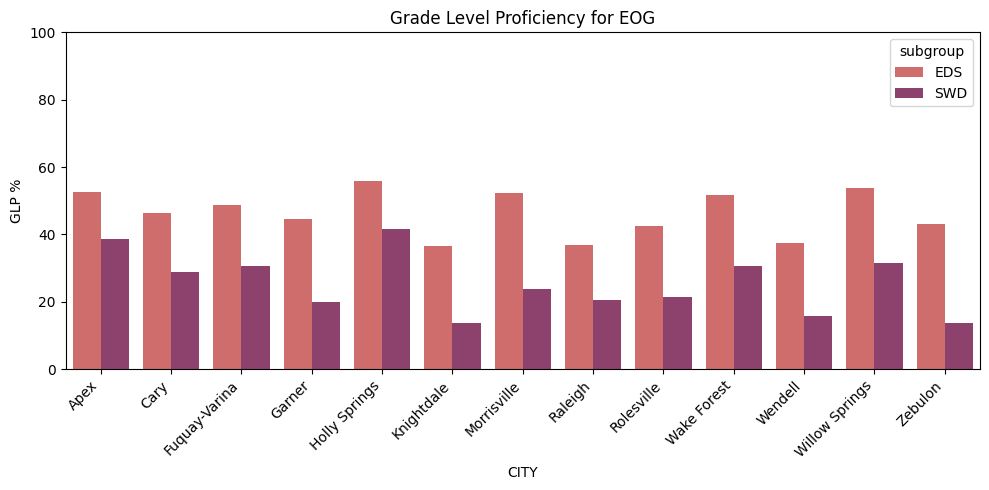

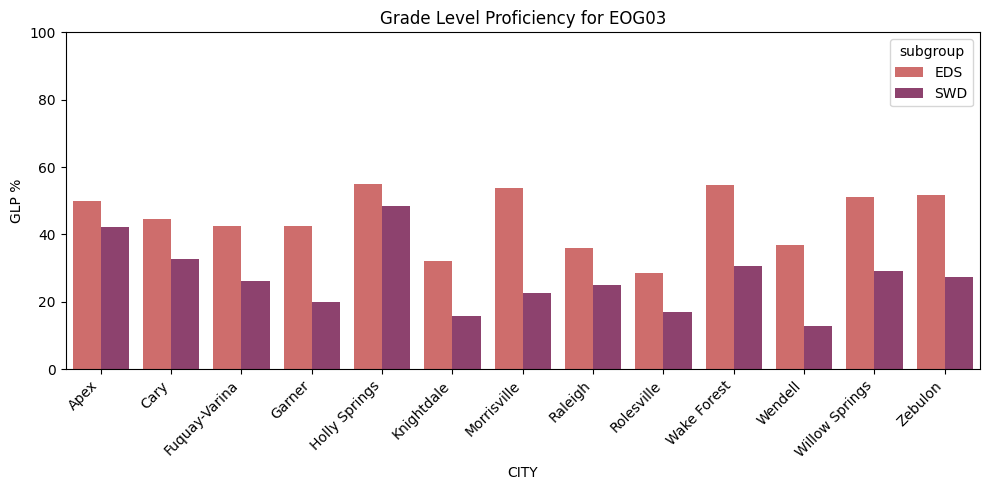

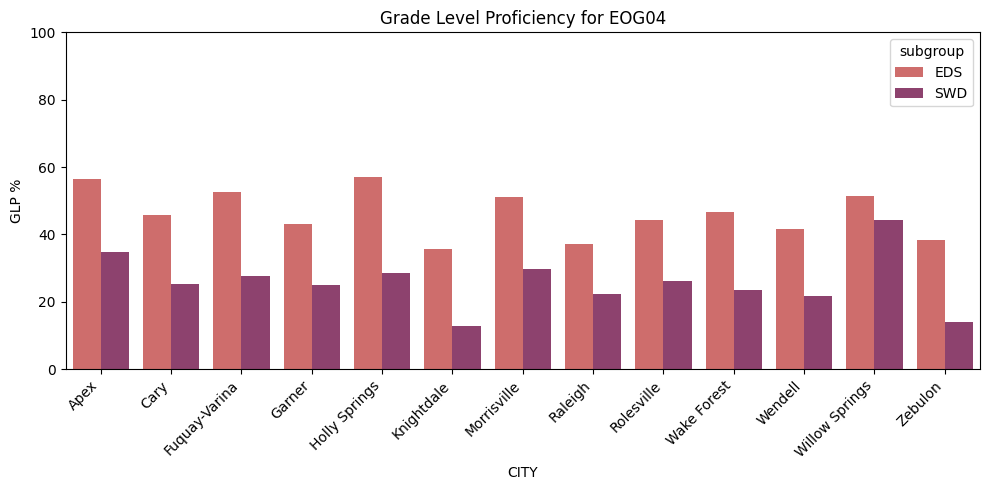

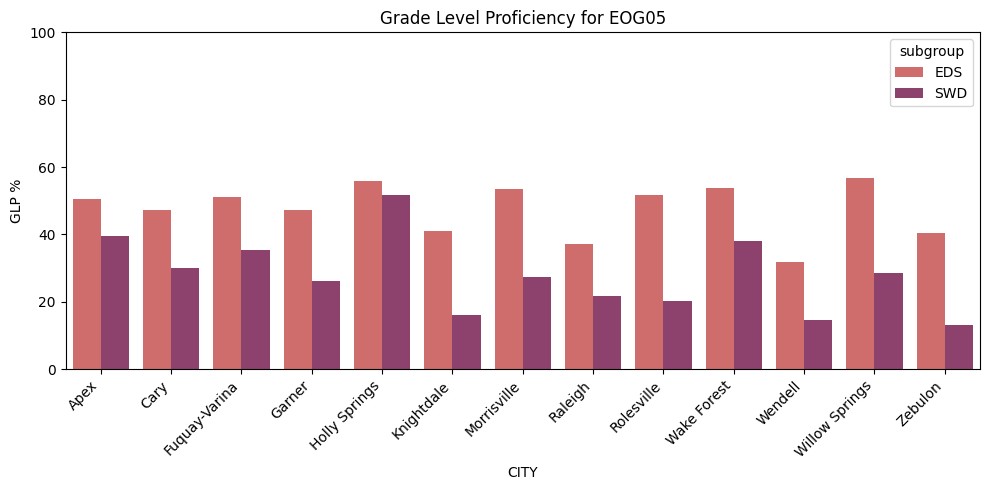

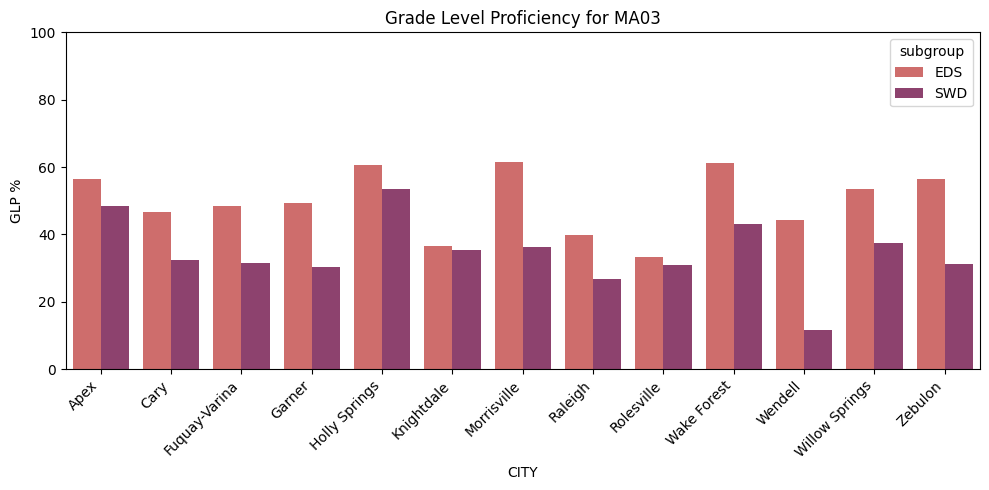

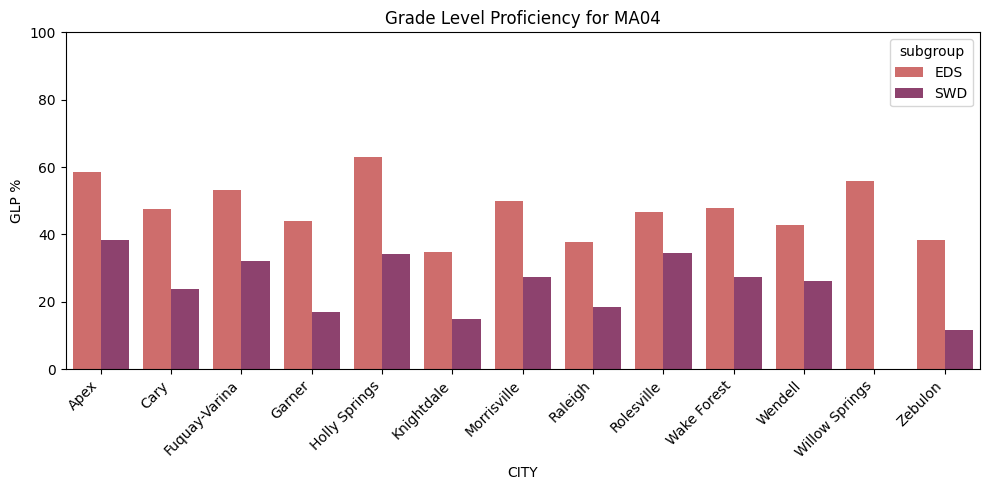

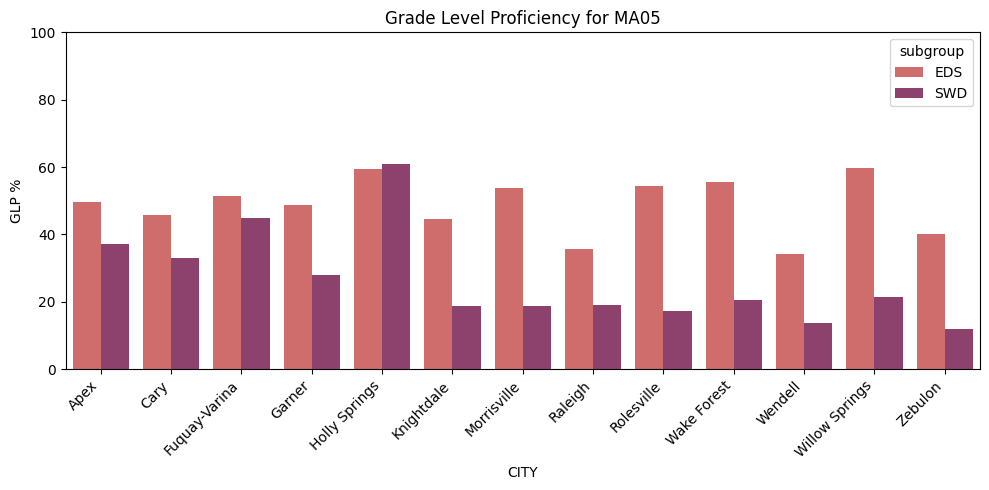

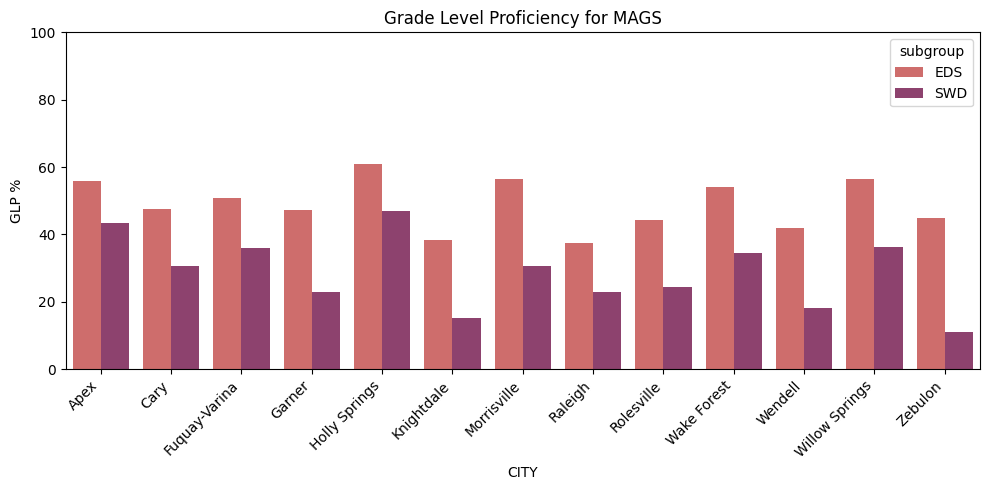

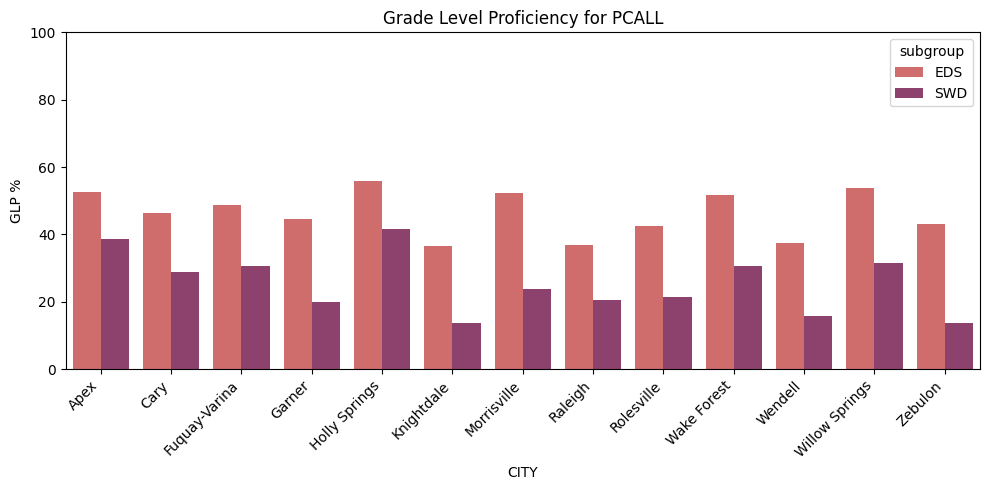

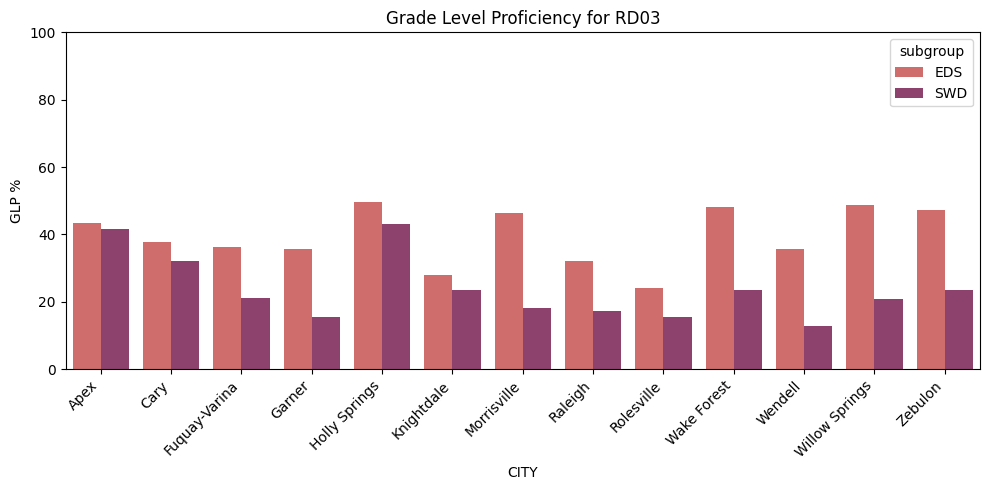

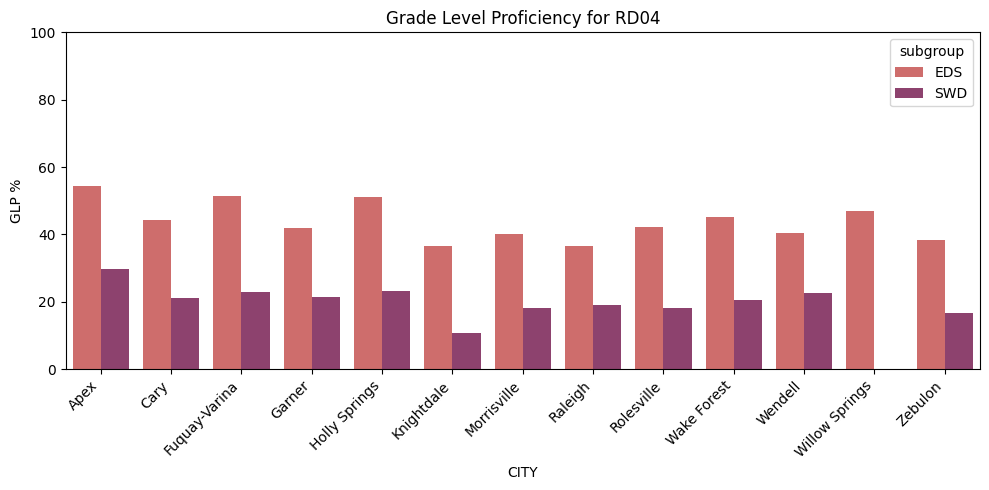

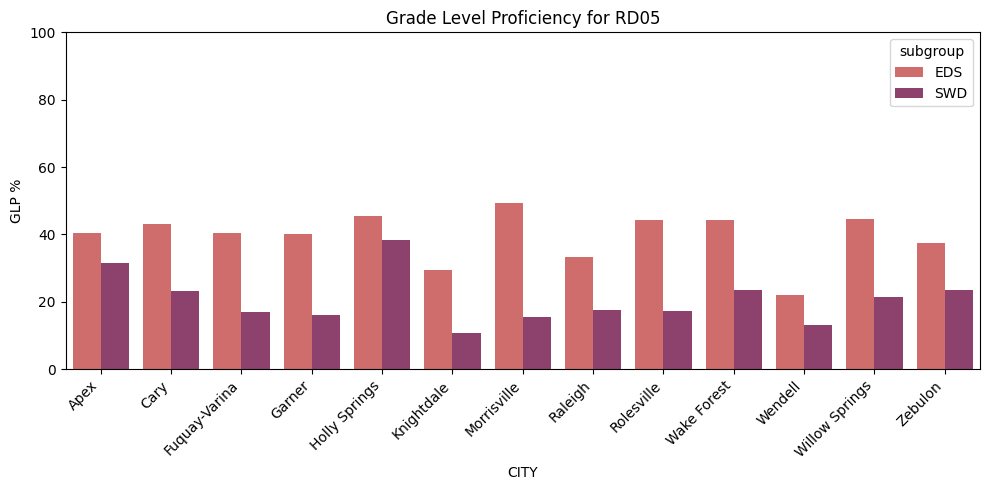

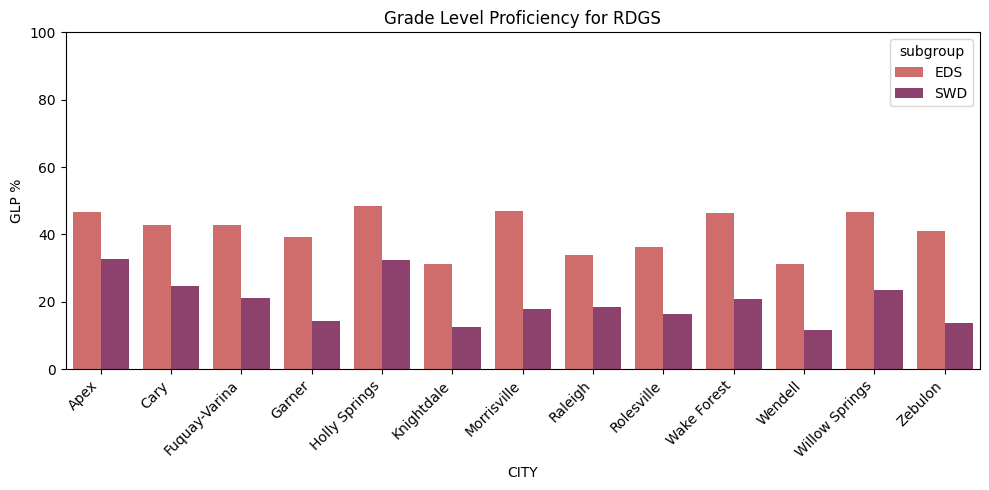

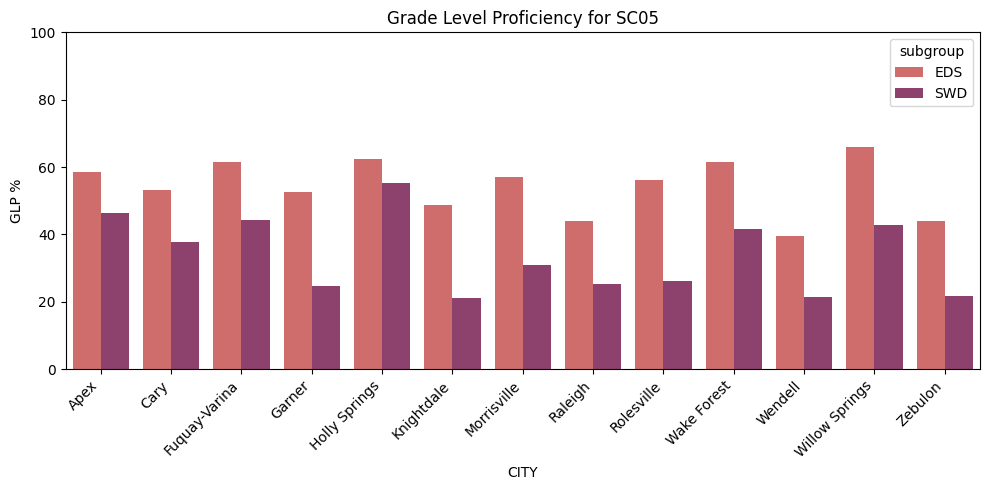

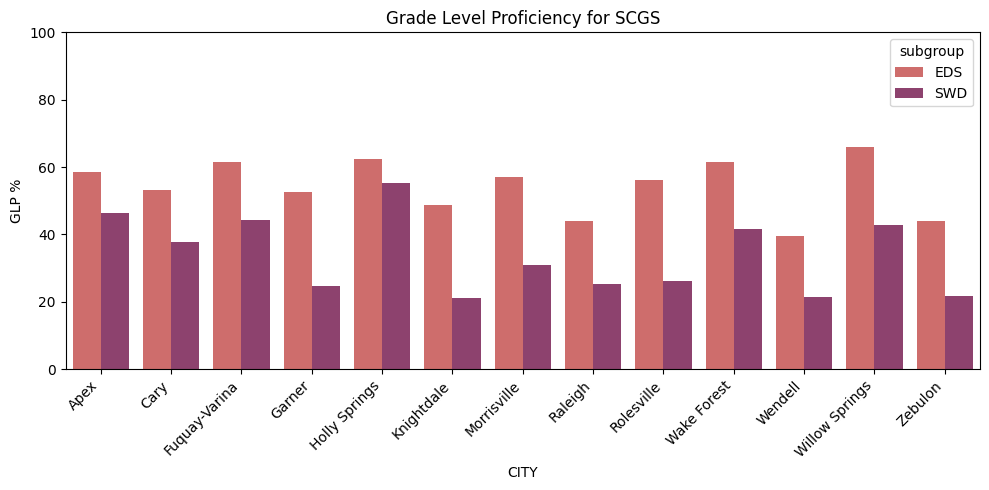

In [242]:
# one barplot per subject comparing GLP % across cities and disadvantaged subgroup


for sub in df_dis_pivot.columns:

    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=df_dis_pivot_reset,
        x='CITY',
        y=sub,
        hue='subgroup',
        palette='flare'
    )
    plt.title(f'Grade Level Proficiency for {sub}')
    plt.ylabel('GLP %')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

In [ ]:
# Comparing the results for PCALL subject alone for both subgroup across all cities

df_dis_PCALL= df_dis[df_dis['subject']=='PCALL']

In [ ]:
df_dis_PCALL

In [ ]:
df_PCALL_summary = df_dis_PCALL.pivot_table(index ='CITY',columns='subgroup',values='glp_pct',aggfunc='mean')

In [ ]:
df_PCALL_summary

Text(0.5, 1.0, 'Overall average grade level proficiency across different areas in Wake County')

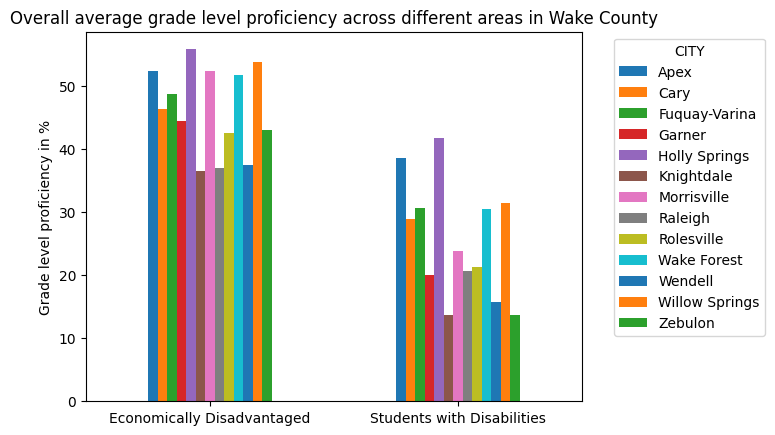

In [241]:
df_PCALL_summary =df_PCALL_summary.rename(columns={'EDS': 'Economically Disadvantaged',
    'SWD': 'Students with Disabilities'})

ax=df_PCALL_summary.T.plot(kind='bar')
plt.legend(title='CITY', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation = 360 ,ha='center')
plt.xlabel("")
plt.ylabel("Grade level proficiency in %")
plt.title("Overall average grade level proficiency across different areas in Wake County")

In [ ]:
ax = df_PCALL_summary.plot(kind='bar', figsize=(12,6), width=0.8)

# Set new subgroup names
new_labels = {
    'EDS': 'Economically Disadvantaged',
    'SWD': 'Students with Disabilities'

}

# Replace legend labels (subgroups are columns)
handles, labels = ax.get_legend_handles_labels()
labels = [new_labels.get(label, label) for label in labels]
ax.legend(handles, labels, title="Subgroup", bbox_to_anchor=(1.05, 1), loc='upper left')

# Optional: beautify
plt.title("GLP% by Subgroup across Cities")
plt.xlabel("City")
plt.ylabel("GLP%")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

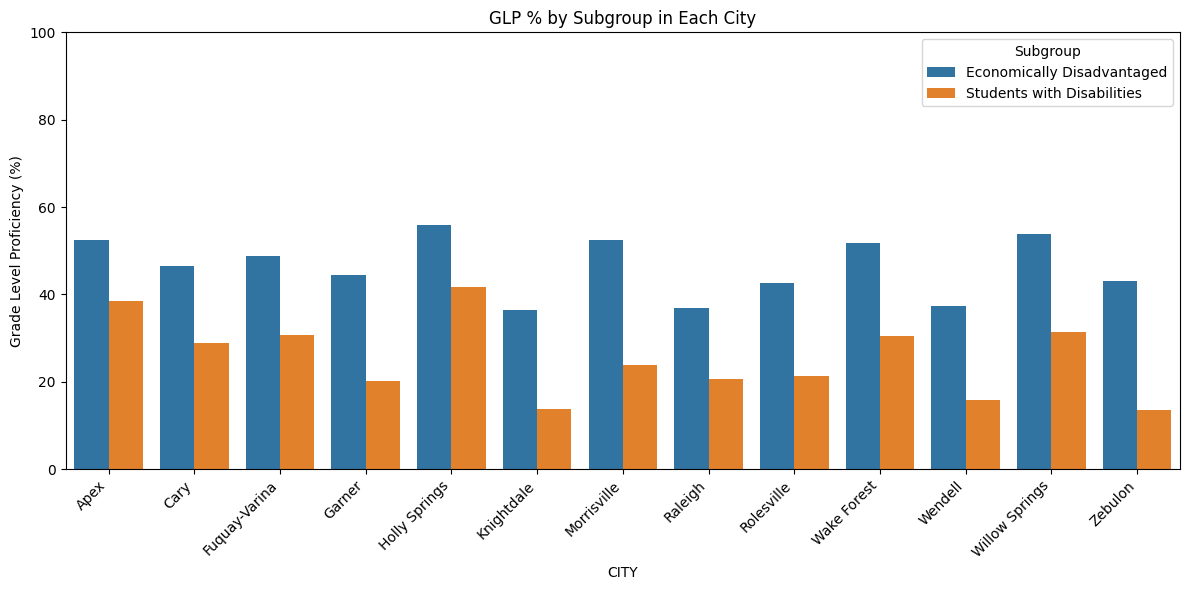

In [240]:


# Reset index so CITY becomes a column
df_PCALL_reset = df_PCALL_summary.reset_index()

# Melt for seaborn (long format)
df_melted = df_PCALL_reset.melt(id_vars='CITY', var_name='Subgroup', value_name='GLP')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='CITY', y='GLP', hue='Subgroup')
plt.title('GLP % by Subgroup in Each City')
plt.ylabel('Grade Level Proficiency (%)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

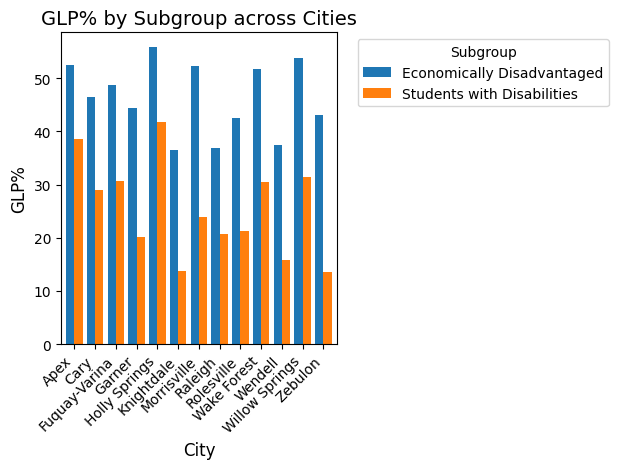

In [239]:
plt.figure(figsize=(12, 6))

# Plot the pivot table directly
df_PCALL_summary.plot(kind='bar', width=0.8)

# Title and axis labels
plt.title("GLP% by Subgroup across Cities", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("GLP%", fontsize=12)

# Rotate x-axis labels for clarity
plt.xticks(rotation=45, ha='right')

# Adjust legend position
plt.legend(title='Subgroup', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tight layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Which areas are serving students who need Free and reduced lunch and limited english proficiency.
# Let's check are area that have schools with lower GLP% have greater percent of FR and LEP students

# Import Free lunch and limited English proficiency data from the excel data

df_FLS = pd.read_excel("C:\\Users\\aksha\\WCPSS_Data_Analysis\\data\\2023-24 District Facts Report by Year.xlsx",sheet_name='FR_LEP_Title 1')
df_FLS.head(10)

In [ ]:
df_FLS = df_FLS[df_FLS['SCHOOL LEVEL']=='E']
df_FLS=df_FLS.drop(columns=['SCHOOL CODE','SCHOOL LEVEL','AREA SUPERINTENDENT','FREE and REDUCED','LEP','TITLE1','ADM Month2'])


In [ ]:
df_FLS=df_FLS.drop(columns='CALENDAR')

In [215]:
df_FLS.head(10)

,SCHOOL NAME,FR PERCENTAGE,LEP PERCENTAGE
0,Abbotts Creek Elementary,0.302,0.076
1,Adams Elementary,0.521,0.278
2,Alston Ridge Elementary,0.132,0.197
4,Apex Elementary,0.290,0.101
5,Apex Friendship Elementary,0.039,0.092
11,Aversboro Elementary,0.735,0.203
12,Baileywick Road Elementary,0.570,0.451
13,Ballentine Elementary,0.272,0.145
14,Banks Road Elementary,0.421,0.165
15,Barton Pond Elementary,0.122,0.044


In [217]:
df_FLS_area = df_FLS.merge(df_schooldata , left_on='SCHOOL NAME',right_on='NAME' ,how='inner')

In [218]:
df_FLS_area.head()

,SCHOOL NAME,FR PERCENTAGE,LEP PERCENTAGE,NAME,GRADELEVEL,CALENDAR,ADDRESS,CITY,TYPE
0,Abbotts Creek Elementary,0.302,0.076,Abbotts Creek Elementary,Elementary,Traditional,Durant Rd,Raleigh,Elementary Schools
1,Adams Elementary,0.521,0.278,Adams Elementary,Elementary,Year-Round,Cary Towne Blvd,Cary,Elementary Schools
2,Alston Ridge Elementary,0.132,0.197,Alston Ridge Elementary,Elementary,Year-Round,Green Level Church Rd,Cary,Elementary Schools
3,Apex Elementary,0.290,0.101,Apex Elementary,Elementary,Traditional,Tingen Rd,Apex,Elementary Schools
4,Aversboro Elementary,0.735,0.203,Aversboro Elementary,Elementary,Traditional,Aversboro Rd,Garner,Elementary Schools


In [219]:
df_FLS_area.columns

Index(['SCHOOL NAME', 'FR PERCENTAGE', 'LEP PERCENTAGE', 'NAME', 'GRADELEVEL',
       'CALENDAR', 'ADDRESS', 'CITY', 'TYPE'],
      dtype='object')

In [220]:
df_FLS_area=df_FLS_area.drop(columns=['NAME', 'GRADELEVEL',
       'CALENDAR', 'ADDRESS','TYPE'])

In [221]:
df_FLS_area.head(10)

,SCHOOL NAME,FR PERCENTAGE,LEP PERCENTAGE,CITY
0,Abbotts Creek Elementary,0.302,0.076,Raleigh
1,Adams Elementary,0.521,0.278,Cary
2,Alston Ridge Elementary,0.132,0.197,Cary
3,Apex Elementary,0.290,0.101,Apex
4,Aversboro Elementary,0.735,0.203,Garner
5,Baileywick Road Elementary,0.570,0.451,Raleigh
6,Ballentine Elementary,0.272,0.145,Fuquay-Varina
7,Banks Road Elementary,0.421,0.165,Raleigh
8,Barwell Road Elementary,0.687,0.216,Raleigh
9,Baucom Elementary,0.220,0.117,Apex


In [223]:
df_FLS_areasummary = df_FLS_area.groupby('CITY')[['FR PERCENTAGE','LEP PERCENTAGE']].mean()

In [225]:
df_FLS_areasummary

,FR PERCENTAGE,LEP PERCENTAGE
CITY,,
Apex,0.171000,0.098900
Cary,0.299667,0.194933
Fuquay-Varina,0.309000,0.095333
Garner,0.617000,0.175714
Holly Springs,0.167000,0.061000
Knightdale,0.708750,0.263250
Morrisville,0.223250,0.210000
Raleigh,0.465759,0.160296
Rolesville,0.346500,0.103000


In [214]:
df_area_wise_performance.head(10)

,CITY,glp_pct
0,Holly Springs,80.397500
1,Apex,75.069643
2,Willow Springs,72.310000
3,Fuquay-Varina,70.053333
4,Wake Forest,69.432500
5,Cary,67.285556
6,Morrisville,63.895000
7,Rolesville,58.550000
8,Raleigh,55.295333
9,Garner,51.774286


In [226]:
df_summary = df_FLS_areasummary.merge(df_area_wise_performance, on ='CITY', how='inner')

In [227]:
df_summary

,CITY,FR PERCENTAGE,LEP PERCENTAGE,glp_pct
0,Apex,0.171000,0.098900,75.069643
1,Cary,0.299667,0.194933,67.285556
2,Fuquay-Varina,0.309000,0.095333,70.053333
3,Garner,0.617000,0.175714,51.774286
4,Holly Springs,0.167000,0.061000,80.397500
5,Knightdale,0.708750,0.263250,42.442500
6,Morrisville,0.223250,0.210000,63.895000
7,Raleigh,0.465759,0.160296,55.295333
8,Rolesville,0.346500,0.103000,58.550000
9,Wake Forest,0.326750,0.059000,69.432500


In [230]:
df_summary = df_summary.sort_values(by=['FR PERCENTAGE','LEP PERCENTAGE'])

In [231]:
df_summary

,CITY,FR PERCENTAGE,LEP PERCENTAGE,glp_pct
4,Holly Springs,0.167000,0.061000,80.397500
0,Apex,0.171000,0.098900,75.069643
6,Morrisville,0.223250,0.210000,63.895000
1,Cary,0.299667,0.194933,67.285556
11,Willow Springs,0.303000,0.102000,72.310000
2,Fuquay-Varina,0.309000,0.095333,70.053333
9,Wake Forest,0.326750,0.059000,69.432500
8,Rolesville,0.346500,0.103000,58.550000
7,Raleigh,0.465759,0.160296,55.295333
10,Wendell,0.611333,0.169667,45.154000


In [234]:
import scipy


# Spearman correlation between GLP% and FR PERCENTAGE
corr_fr = df_summary['glp_pct'].corr(df_summary['FR PERCENTAGE'], method='spearman')

# Spearman correlation between GLP% and LEP PERCENTAGE
corr_lep = df_summary['glp_pct'].corr(df_summary['LEP PERCENTAGE'], method='spearman')

print(f"Spearman correlation between GLP% and FR%: {corr_fr:.2f}")
print(f"Spearman correlation between GLP% and LEP%: {corr_lep:.2f}")


Spearman correlation between GLP% and FR%: -0.88
Spearman correlation between GLP% and LEP%: -0.71


# Spearman correlation between GLP% and FR%: -0.88
# Spearman correlation between GLP% and LEP%: -0.71

This shows a strong negative correlation between Grade Level performance and free or reduced lunch(indicator of socio-economic status).As the economic disadvantage increases the GLP% also decrease significantly.
Also, limited English proficiency also has a negative impact on Grade Level proficiency.Schools with more LEP students generally have lower GLP



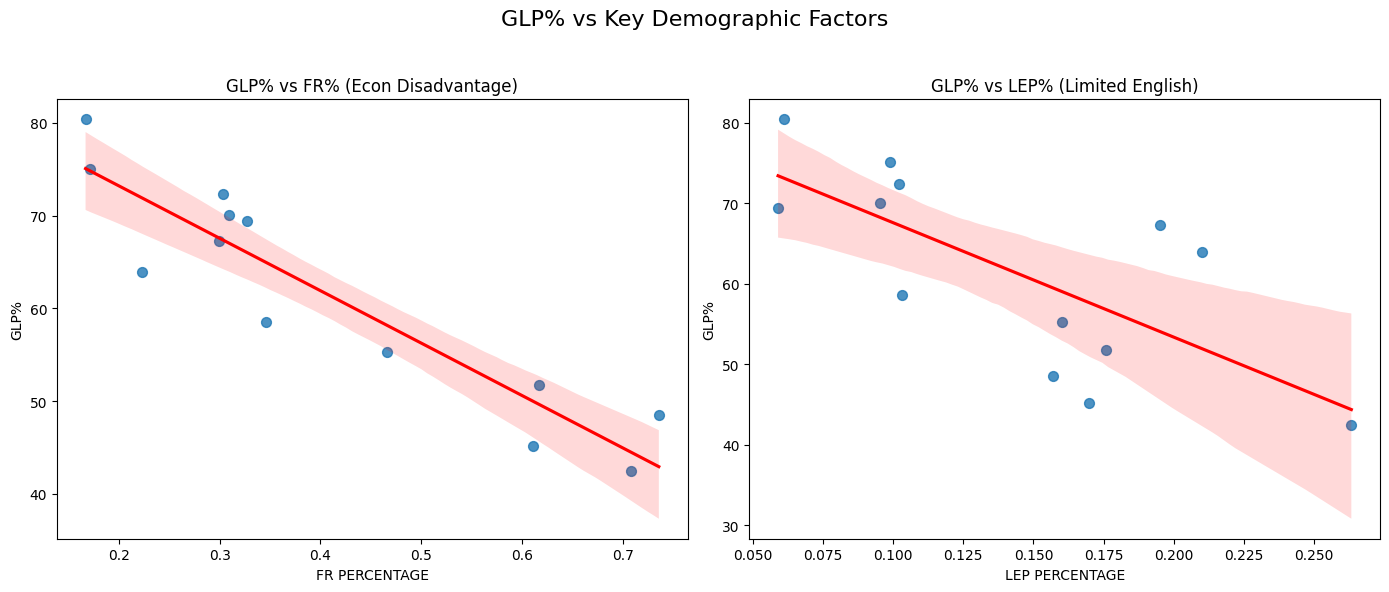

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GLP vs FR%
sns.regplot(
    data=df_summary,
    x='FR PERCENTAGE', y='glp_pct',
    ax=ax[0], scatter_kws={'s': 50}, line_kws={"color": "red"},
)
ax[0].set_title("GLP% vs FR% (Econ Disadvantage)")
ax[0].set_ylabel("GLP%")
ax[0].set_xlabel("FR PERCENTAGE")

# GLP vs LEP%
sns.regplot(
    data=df_summary,
    x='LEP PERCENTAGE', y='glp_pct',
    ax=ax[1], scatter_kws={'s': 50}, line_kws={"color": "red"},
)
ax[1].set_title("GLP% vs LEP% (Limited English)")
ax[1].set_ylabel("GLP%")
ax[1].set_xlabel("LEP PERCENTAGE")

plt.suptitle("GLP% vs Key Demographic Factors", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
